# Análise de Risco de Crédito - NuBank

Risco de crédito está associado à possibilidade de um cliente não cumprir com as obrigações contratuais, como hipotecas, dívidas de cartão de crédito e outros tipos de empréstimos.

Minimizar o risco de inadimplência é uma grande preocupação para instituições financeiras. Por esse motivo, bancos comerciais e de investimento, fundos de capital de risco, empresas de gestão de ativos e seguradoras, para citar alguns, estão cada vez mais contando com a tecnologia para prever quais clientes são mais propensos a não honrar com as suas dívidas.

Modelos de Machine Learning têm ajudado essas empresas a melhorar a precisão de suas análises de risco de crédito, fornecendo um método científico para identificar devedores em potencial com antecedência.

Neste projeto, construiremos um modelo para prever o risco de inadimplência do cliente para o Nubank, uma das maiores e importantes Fintechs brasileira.

## Importação das Bibliotecas

In [1]:
# import dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# definição do estilo estético das plotagens
sns.set_style()

# filtragem de warnings
import warnings
warnings.filterwarnings('ignore')   

from sklearn.impute import SimpleImputer



## Importação do Dataset

In [2]:
df = pd.read_csv('data/acquisition_train.csv')

## Visualização dos dados

In [3]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## Análise dos Dados

In [4]:
# Dataframe shape
print('Número de linhas do dataset: ', df.shape[0])
print('Número de colunas do dataset: ', df.shape[1])

Número de linhas do dataset:  45000
Número de colunas do dataset:  43


In [5]:
# Informações sobre o dataset	
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

Podemos ver que algumas variáveis possuem valores ausentes. Vamos dar uma olhada mais de perto nelas.

In [6]:
# Porcentagem de valores faltantes
print(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

- Estamos trabalhando com um conjunto de dados com 43 variáveis e 45.000 registros. 
- target_default é uma variável tipo True/False, é uma variável target que iremos tentar prever. 
- Também podemos observar que nela há valores ausentes, mais de 5%. 
- Portanto não temos muitas opções aqui. Então, eliminaremos todas as entradas onde target_default é nulo.

In [7]:
# cópia de df
df2 = df.copy()

In [8]:
#exclusão de valores ausentes da coluna target_default
df2.dropna(subset=['target_default'], inplace=True)

Podemos observar que target_fraud tem quase 97% de valores ausentes. Por não ser uma variável tão importante, vamos excluir.


In [9]:
# exclusão da coluna target_fraud
df2.drop('target_fraud', axis=1, inplace=True)

Vamos examinar o número de valores únicos para cada variável.

In [10]:
df2.nunique().sort_values()

channel                                                 1
external_data_provider_credit_checks_last_2_year        1
last_borrowed_in_months                                 2
target_default                                          2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
real_state                                              5
n_defaulted_loans                                       5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

As variáveis channel e external_data_provider_credit_checks_last_2_year têm apenas um valor. Como isso não será útil para o modelo, podemos remover essas duas colunas.

In [11]:
# exclusão das colunas "channel" e "external_data_provider_credit_checks_last_2_year"
df2.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

Continuando com o processo de limpeza, para manter o conjunto de dados o mais adequado possível, removeremos algumas outras colunas que não estão agregando valor ao modelo. Algumas variáveis, como score_1 e score_2, são preenchidos com valores hash. No entanto, estamos mantendo essas variáveis, pois elas podem ser úteis para o nosso modelo.

In [12]:
df2.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

Agora estamos trabalhando com um conjunto de dados mais limpo. Antes de lidar com os valores ausentes, vamos examinar se há outliers no conjunto de dados. Começaremos dando uma olhada em alguns detalhes estatísticos.

In [13]:
# estatistica descritiva basica
df2.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [14]:
# contagem de informações na variável reported_income
np.isinf(df2['reported_income']).sum()

66

In [15]:
# contagem de valores = -999 na variável external_data_provider_email_seen_before
df2.loc[df2['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

external_data_provider_email_seen_before
-999.0    591
Name: count, dtype: int64

Ao examinar as estatísticas acima, notamos que reported_income tem 66 valores exibidos como "inf". Além disso, temos 591 valores de external_data_provider_email_seen_before exibidos como -999. Substituiremos esses valores por NaN, para que possamos plotar histogramas para visualizar as distribuições dos valores.

In [16]:
# substituição de valores inf por nan na variavel reported_income
df2['reported_income'] = df2['reported_income'].replace(np.inf, np.nan)

# substituição dos valores -999 por nan na variavel external_data_provider_email_seen_before
df2.loc[df2['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan
     

Um novo data frame, contendo características numéricas de interesse, será criado. Plotar um histograma para essas características nos ajudará a examinar sua distribuição.

In [17]:
# dataframe contendo apenas variáveis numéricas
df2_numerical = df2[['score_3', 'risk_rate', 'last_amount_borrowed', 
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
                                 'external_data_provider_email_seen_before']]

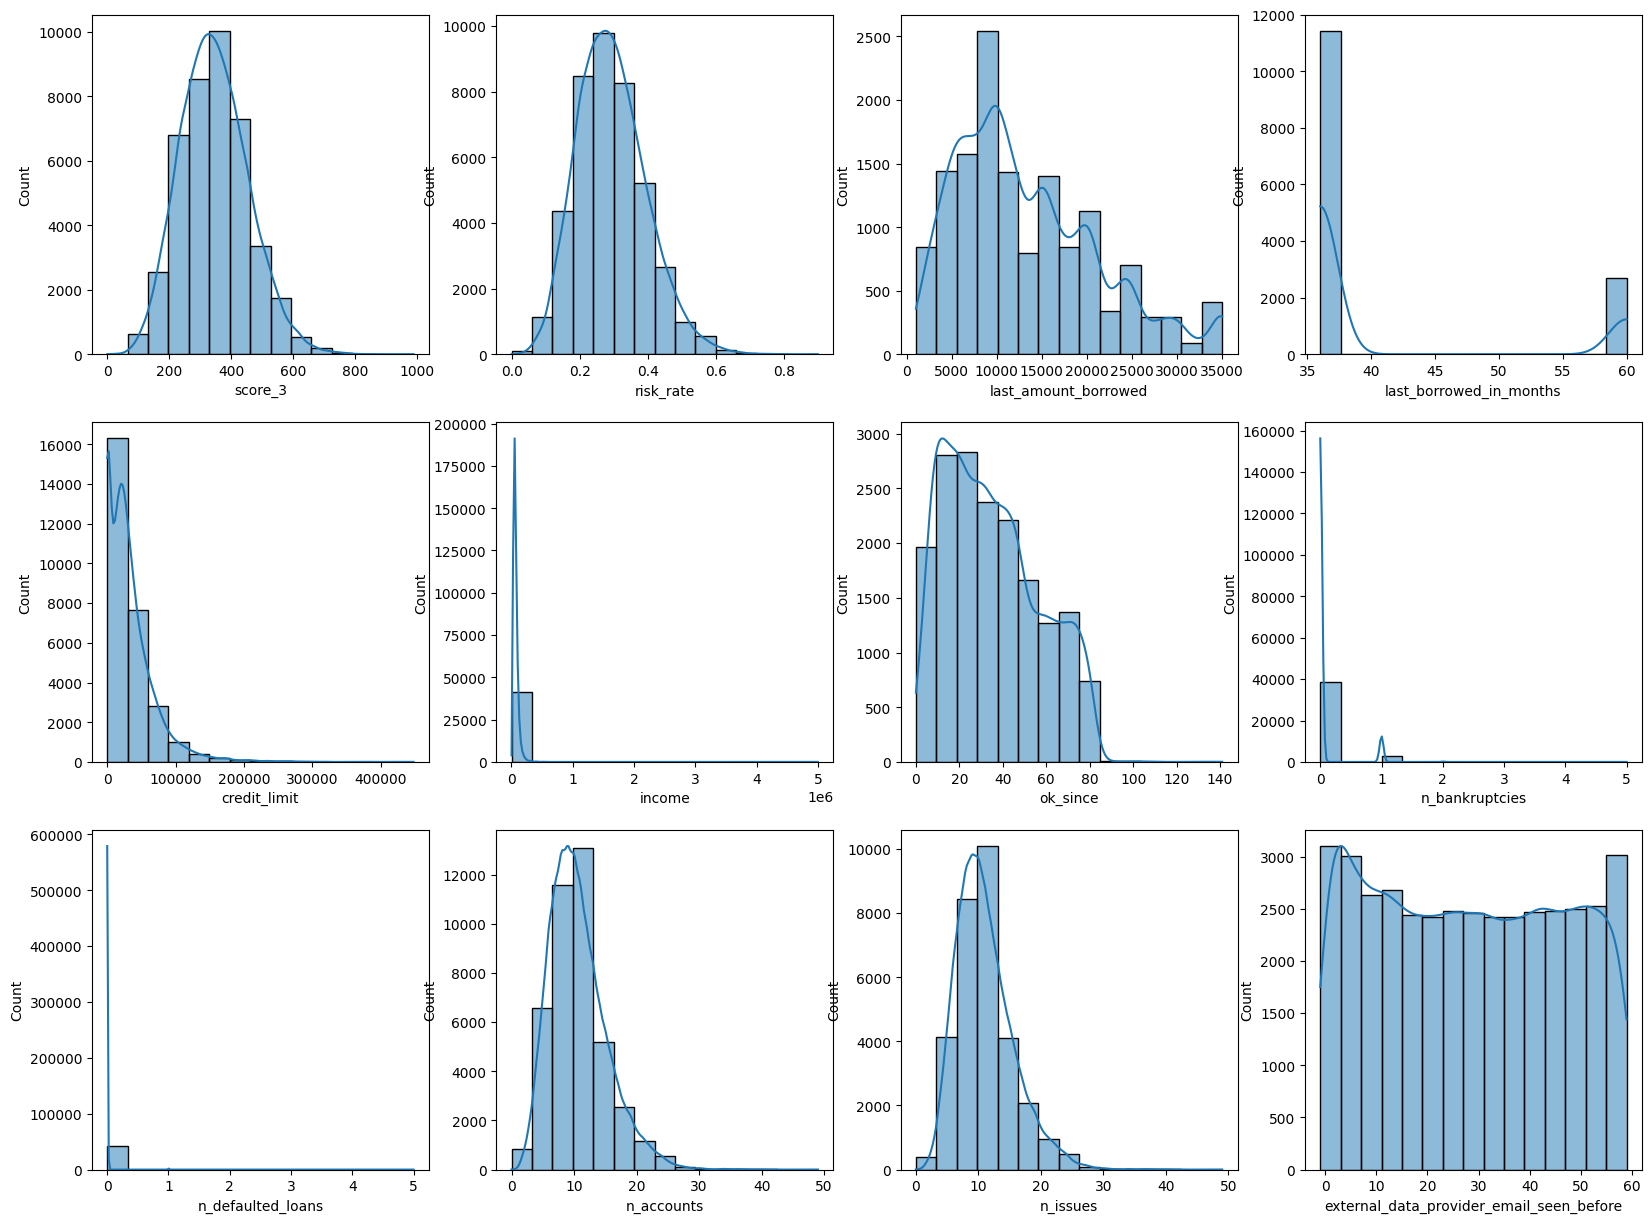

In [18]:
# plot de histogramas para cada variável numérica

nrows = 3
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

r = 0
c = 0

for i in df2_numerical:
    sns.histplot(df2_numerical[i], bins=15, kde=True, ax=ax[r][c])
    if c == ncols - 1:
        r += 1
        c = 0
    else:
        c += 1
plt.show()

Todas essas variáveis acima têm valores ausentes que precisam ser tratados. Como podemos ver, eles têm distribuição distorcida, o que é uma indicação de que devemos preencher os valores ausentes com o valor mediano para cada recurso:

- Variáveis ​​categóricas serão preenchidas com o valor mais recorrente.
- Variáveis ​​numéricas serão preenchidas com seus valores medianos.
- Nos casos específicos de last_amount_borrowed, last_borrowed_in_months e n_issues, preencheremos os valores ausentes com zero, pois é razoável acreditar que nem todo cliente teria valores atribuídos a essas variáveis.

In [19]:
df2_num = df2.select_dtypes(exclude='object').columns
df2_cat = df2.select_dtypes(include='object').columns

In [20]:
# preencher os valores ausentes nas variaveis "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
df2['last_amount_borrowed'].fillna(value=0, inplace=True)
df2['last_borrowed_in_months'].fillna(value=0, inplace=True)
df2['n_issues'].fillna(value=0, inplace=True)

# preencher os valores ausentes nas variaveis "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
df2['last_amount_borrowed'].fillna(value=0, inplace=True)
df2['last_borrowed_in_months'].fillna(value=0, inplace=True)
df2['n_issues'].fillna(value=0, inplace=True)

# preencher os valores ausentes nas variaveis numericas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df2.loc[:, df2_num])
df2.loc[:, df2_num] = imputer.transform(df2.loc[:, df2_num])

# preencher os valores ausentes nas variaveis categoricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df2.loc[:, df2_cat])
df2.loc[:, df2_cat] = imputer.transform(df2.loc[:, df2_cat])

In [21]:
df2.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [22]:
df2.head().T

,0,1,2,3,4
target_default,False,False,True,False,False
score_1,1Rk8w4Ucd5yR3KcqZzLdow==,DGCQep2AE5QRkNCshIAlFQ==,DGCQep2AE5QRkNCshIAlFQ==,1Rk8w4Ucd5yR3KcqZzLdow==,8k8UDR4Yx0qasAjkGrUZLw==
score_2,IOVu8au3ISbo6+zmfnYwMg==,SaamrHMo23l/3TwXOWgVzw==,Fv28Bz0YRTVAT5kl1bAV6g==,dCm9hFKfdRm7ej3jW+gyxw==,+CxEO4w7jv3QPI/BQbyqAA==
score_3,350.0,370.0,360.0,510.0,500.0
score_4,101.800832,97.062615,100.027073,101.599485,98.474289
score_5,0.259555,0.942655,0.351918,0.987673,0.532539
score_6,108.427273,92.002546,112.892453,94.902491,118.126207
risk_rate,0.4,0.24,0.29,0.32,0.18
last_amount_borrowed,25033.92,0.0,7207.92,0.0,0.0
last_borrowed_in_months,36.0,0.0,36.0,0.0,0.0
